**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_folder = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


## Prepare

**Set global variable**

In [4]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
TXT_ASSAY_FOLDER = "STARR_ATAC_K562_Reddy_KS91"
TXT_ASSAY_LABEL  = "ASTARR"

**View files**

In [6]:
txt_assay  = TXT_ASSAY_FOLDER
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")

vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

data.count_column.raw.WGS.rds 
data.deseq2.rds 
data.edger.rds 
matrix.count.deseq.WGS.tsv 
matrix.count.FPKM.WGS.tsv 
matrix.count.raw.WGS.tsv 
matrix.count.TPM.WGS.tsv 
region.coverage.Log2FC.deseq.tsv 
region.coverage.screened.tsv 
region.coverage.summary.tsv 


## Import data

In [7]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_assay = TXT_ASSAY_FOLDER
    txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "matrix.count.TPM.WGS.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_tpm_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     14

$fcc_astarr_macs_input_union
[1] 246852     14



Chrom,ChromStart,ChromEnd,Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,3.445338,3.888148,4.290341,4.273202,3.397390,4.345809,0.8436118,1.171350,0.3693823,0.4884531
chr1,14282,14614,chr1:14282-14614,2.784182,2.886126,2.973866,2.825963,2.595126,2.984980,1.4920749,2.481768,2.6541010,2.2137812
chr1,16025,16338,chr1:16025-16338,3.454675,4.162517,3.607961,3.719535,3.983521,4.056664,1.5826481,0.801171,1.6241611,1.0309013


In [8]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_assay = TXT_ASSAY_FOLDER
    txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.summary.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_summary_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     10

$fcc_astarr_macs_input_union
[1] 246852     10



Chrom,ChromStart,ChromEnd,Region,Input_DESeq,Input_FPKM,Input_TPM,Output_DESeq,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,96.32888,0.004164383,3.940038,22.18751,0.0007357323,0.7181993
chr1,14282,14614,chr1:14282-14614,62.86738,0.003003325,2.841707,61.74133,0.0022620843,2.2104314
chr1,16025,16338,chr1:16025-16338,79.89682,0.004048701,3.830812,33.38053,0.0012867327,1.2597204


## Arrange table

## Set plot style

In [9]:
### set text size
THEME_TEXT = theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 16),
    strip.text   = element_text(size = 16)
)

## Explore: Correlations across replicates

## Explore: Correlations across input and output

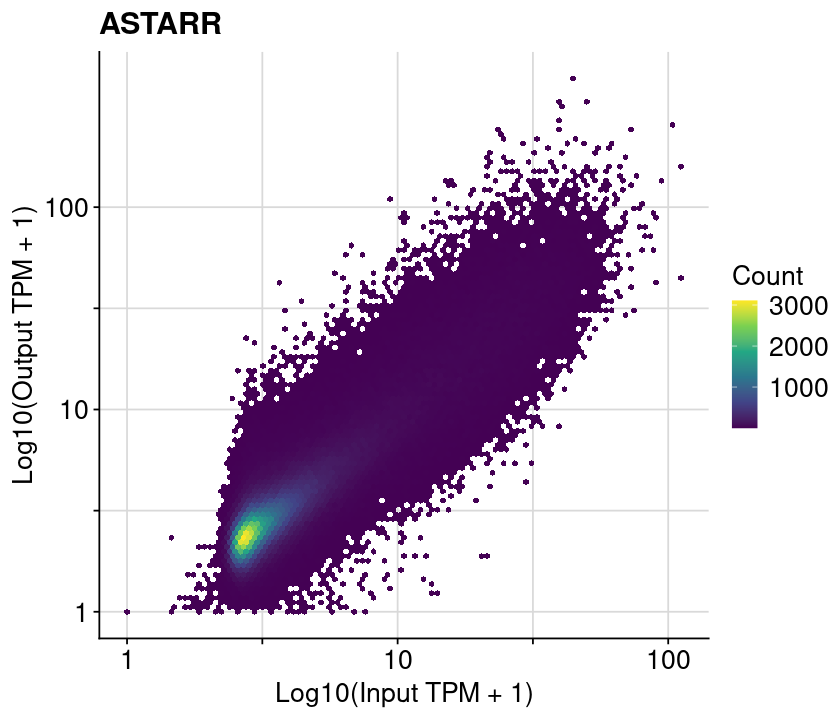

In [10]:
### set plot style
theme_text = THEME_TEXT

### generate plot
lst = lst_dat_region_score_summary_import
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=.data[["Input_TPM"]] + 1, y=.data[["Output_TPM"]] + 1)) + 
        geom_hex(bins=100) +
        scale_fill_viridis_c() +
        theme_cowplot() +
        background_grid() +
        scale_x_log10(
            breaks = c( 1,  10^0.5, 10,  10^1.5,  100),
            labels = c("1", "",    "10", "",     "100")
        ) +
        scale_y_log10(
            breaks = c( 1,  10^0.5, 10,  10^1.5,  100),
            labels = c("1", "",    "10", "",     "100")
        ) +
        labs(
            x     = "Log10(Input TPM + 1)",
            y     = "Log10(Output TPM + 1)",
            title = TXT_ASSAY_LABEL,
            fill  = "Count"
        ) +
        theme_text
    return(gpt)
})

### assign and show
lst_gpt_scatter_input_vs_output = lst

idx = "fcc_astarr_macs_input_union"
gpt = lst[[idx]]

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

## Save plots

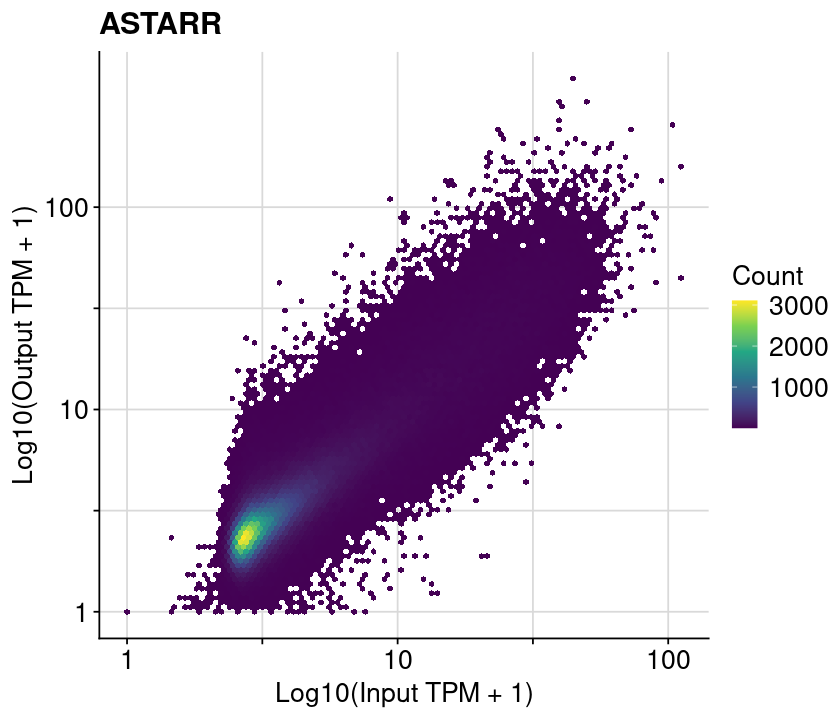

In [11]:
### get plot
lst = lst_gpt_scatter_input_vs_output
idx = "fcc_astarr_macs_input_union"
gpt = lst[[idx]]

### assign and show
gpt_scatter_input_vs_output = gpt
options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [12]:
plt_export = gpt_scatter_input_vs_output
txt_export = "fig.region_coverage_fcc.scatter_hex.zscore.input_vs_output.astarr"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 6, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 6, width = 7, units = "in")